In [3]:
import skimage
import skimage.io
import skimage.transform
import skimage.feature
import skimage.filters

import skimage.color
import pyclesperanto_prototype as cle
import napari

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read image and convert to grayscale
img = skimage.io.imread('./data/Inconeli/1.bmp', as_gray=True)

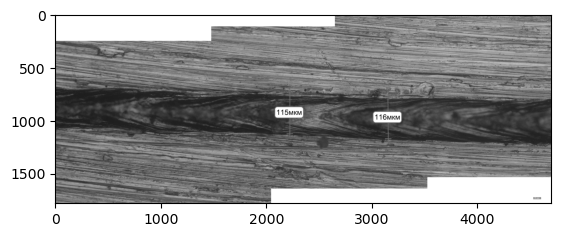

In [6]:
plt.imshow(img, cmap="gray")
plt.show()

In [8]:
# Push original, binary and labeled images to napari
viewer = napari.Viewer()
viewer.add_image(img, name='original')

<Image layer 'original' at 0x2806f015f70>

In [13]:
try:
    borders = np.array(viewer.layers[layer_name].data)
    borders_int = borders.astype(int)
    for i, b in enumerate(borders_int):
        # Check if IndexErrors occur
        y_min = min(b[1][0],b[3][0])
        y_max = max(b[1][0],b[3][0])
        x_min = min(b[1][1],b[3][1])
        x_max = max(b[1][1],b[3][1])
        try:
            skimage.io.imsave('./data/cropped_manual/' + str(i+1) + '.png', img[y_min:y_max, x_min:x_max])
        except IndexError:
            print(f"Can't save image #{i}")
            print(f"It's coord in the image are: {b[1][0]}:{b[3][0]}, {b[1][1]}:{b[3][1]}")
except NameError:
    layer_name = input("Please enter the name of the layer with the rectangles: ")
    # Create a shape layer in napari
    viewer.add_shapes(name=layer_name, shape_type='rectangle', edge_color='red', edge_width=10)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [15]:
viewer.layers.clear()
viewer.add_image(skimage.io.imread('./data/cropped_manual/1.png', as_gray=True)\
                 ,name='Cropped_img')

<Image layer 'Cropped_img' at 0x28001d82430>

In [18]:
labels = viewer.layers['Labels'].data